# 코비 슛 성공 예측

### 데이터 로드

In [1]:
#https://www.kaggle.com/c/kobe-bryant-shot-selection/data
import pandas as pd

raw = pd.read_csv("data.csv")

In [2]:
raw.shape

(30697, 25)

In [3]:
raw.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


## 데이터 살펴보기

In [4]:
for col in raw.columns:
    print(col)

action_type
combined_shot_type
game_event_id
game_id
lat
loc_x
loc_y
lon
minutes_remaining
period
playoffs
season
seconds_remaining
shot_distance
shot_made_flag
shot_type
shot_zone_area
shot_zone_basic
shot_zone_range
team_id
team_name
game_date
matchup
opponent
shot_id


In [6]:
raw.info()
# shot_made_flag        25697 non-null float64    cf) 30697 non-null object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [5]:
raw.shot_made_flag.head(10)
# shot_made_flag   1 or 0  분류 문제
# NaN 은 답을 알 수 없기에 제외 필요함

0    NaN
1    0.0
2    1.0
3    0.0
4    1.0
5    0.0
6    1.0
7    NaN
8    1.0
9    0.0
Name: shot_made_flag, dtype: float64

 - 데이터 제외하기: dropna  or isnull 활용

In [9]:
# data = raw.dropna(axis = 0, subset = ['shot_made_flag'])      # 'shot_made_flag  에 Nan 값이 있을 경우 해당 row 를  drop하라

# .isnull 을 이용해서 동일하게 만들 수 있음
data = raw[raw.shot_made_flag.isnull() == False]        

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 25 columns):
action_type           25697 non-null object
combined_shot_type    25697 non-null object
game_event_id         25697 non-null int64
game_id               25697 non-null int64
lat                   25697 non-null float64
loc_x                 25697 non-null int64
loc_y                 25697 non-null int64
lon                   25697 non-null float64
minutes_remaining     25697 non-null int64
period                25697 non-null int64
playoffs              25697 non-null int64
season                25697 non-null object
seconds_remaining     25697 non-null int64
shot_distance         25697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             25697 non-null object
shot_zone_area        25697 non-null object
shot_zone_basic       25697 non-null object
shot_zone_range       25697 non-null object
team_id               25697 non-null int64
team_name         

###  action_shot 데이터 살펴보기

In [ ]:
data.pivot('action_type','shot_made_flag',"count")

In [13]:
action_shots = []
for action in set(data.action_type):
    count_try = len(data[data.action_type == action])
    count_made = sum(data[data.action_type == action].shot_made_flag)
    made_percent = count_made / count_try
    action_shots.append((action, count_try, count_made, int(made_percent*1000)/10))

In [14]:
for shot in action_shots[:20]:
    print(shot)    # 슛 종류 , 슛 시도 횟수, 슛 성공횟수

('Alley Oop Dunk Shot', 95, 90.0, 94.7)
('Jump Bank Shot', 289, 224.0, 77.5)
('Tip Layup Shot', 2, 1.0, 50.0)
('Driving Dunk Shot', 257, 251.0, 97.6)
('Tip Shot', 151, 53.0, 35.0)
('Hook Bank Shot', 5, 5.0, 100.0)
('Pullup Jump shot', 402, 291.0, 72.3)
('Driving Bank shot', 3, 2.0, 66.6)
('Running Tip Shot', 1, 0.0, 0.0)
('Running Reverse Layup Shot', 7, 4.0, 57.1)
('Pullup Bank shot', 11, 6.0, 54.5)
('Running Layup Shot', 51, 36.0, 70.5)
('Fadeaway Bank shot', 27, 24.0, 88.8)
('Alley Oop Layup shot', 67, 48.0, 71.6)
('Running Slam Dunk Shot', 1, 1.0, 100.0)
('Floating Jump shot', 93, 67.0, 72.0)
('Running Jump Shot', 779, 582.0, 74.7)
('Driving Jump shot', 23, 10.0, 43.4)
('Turnaround Bank shot', 58, 46.0, 79.3)
('Turnaround Jump Shot', 891, 533.0, 59.8)


In [15]:
# # 성공률 순으로 살펴보기

# def cal_shot_success(x):
#     if x[2] == 0:
#         return 0
#     else:
#         return x[2]/x[1]
    

action_shots.sort(key = lambda x: x[3], reverse=True)     # 슛 성공횟수 많은 순으로 정렬


# # action_shots.sort(key = lambda x: x[1]/x[2], reverse=True)  # 슛 성공률 높은 순으로 정렬  0 이 나올 경우 계산 X
# action_shots.sort(key = lambda x: cal_shot_success(x), reverse=True)

In [16]:
for shot in action_shots[:20]:
    print(shot)    # 슛 종류 , 슛 시도 횟수, 슛 성공횟수

('Hook Bank Shot', 5, 5.0, 100.0)
('Running Slam Dunk Shot', 1, 1.0, 100.0)
('Driving Floating Bank Jump Shot', 1, 1.0, 100.0)
('Turnaround Finger Roll Shot', 2, 2.0, 100.0)
('Reverse Slam Dunk Shot', 15, 15.0, 100.0)
('Slam Dunk Shot', 334, 328.0, 98.2)
('Driving Dunk Shot', 257, 251.0, 97.6)
('Driving Slam Dunk Shot', 43, 42.0, 97.6)
('Alley Oop Dunk Shot', 95, 90.0, 94.7)
('Reverse Dunk Shot', 61, 56.0, 91.8)
('Follow Up Dunk Shot', 10, 9.0, 90.0)
('Fadeaway Bank shot', 27, 24.0, 88.8)
('Running Dunk Shot', 18, 16.0, 88.8)
('Driving Finger Roll Layup Shot', 59, 52.0, 88.1)
('Running Hook Shot', 33, 29.0, 87.8)
('Driving Finger Roll Shot', 68, 58.0, 85.2)
('Running Bank shot', 43, 36.0, 83.7)
('Finger Roll Layup Shot', 28, 23.0, 82.1)
('Turnaround Bank shot', 58, 46.0, 79.3)
('Dunk Shot', 217, 169.0, 77.8)


In [17]:
data_action_type = pd.DataFrame(action_shots, columns = ['action_type', 'try','made', 'per'])

In [18]:
data_action_type.head()

,action_type,try,made,per
0,Hook Bank Shot,5,5.0,100.0
1,Running Slam Dunk Shot,1,1.0,100.0
2,Driving Floating Bank Jump Shot,1,1.0,100.0
3,Turnaround Finger Roll Shot,2,2.0,100.0
4,Reverse Slam Dunk Shot,15,15.0,100.0


* pandas 활용해서 하기

In [30]:
data_action_try = data.groupby('action_type').shot_made_flag.count()

In [43]:
data_action_made = data.groupby('action_type').shot_made_flag.sum().astype('int64')

In [31]:
data_action_try

action_type
Alley Oop Dunk Shot                   95
Alley Oop Layup shot                  67
Cutting Layup Shot                     6
Driving Bank shot                      3
Driving Dunk Shot                    257
Driving Finger Roll Layup Shot        59
Driving Finger Roll Shot              68
Driving Floating Bank Jump Shot        1
Driving Floating Jump Shot             3
Driving Hook Shot                     13
Driving Jump shot                     23
Driving Layup Shot                  1628
Driving Reverse Layup Shot            83
Driving Slam Dunk Shot                43
Dunk Shot                            217
Fadeaway Bank shot                    27
Fadeaway Jump Shot                   872
Finger Roll Layup Shot                28
Finger Roll Shot                      26
Floating Jump shot                    93
Follow Up Dunk Shot                   10
Hook Bank Shot                         5
Hook Shot                             73
Jump Bank Shot                       289
Jump

In [45]:
data_action_made

action_type
Alley Oop Dunk Shot                  90
Alley Oop Layup shot                 48
Cutting Layup Shot                    4
Driving Bank shot                     2
Driving Dunk Shot                   251
Driving Finger Roll Layup Shot       52
Driving Finger Roll Shot             58
Driving Floating Bank Jump Shot       1
Driving Floating Jump Shot            1
Driving Hook Shot                     8
Driving Jump shot                    10
Driving Layup Shot                 1207
Driving Reverse Layup Shot           62
Driving Slam Dunk Shot               42
Dunk Shot                           169
Fadeaway Bank shot                   24
Fadeaway Jump Shot                  501
Finger Roll Layup Shot               23
Finger Roll Shot                     12
Floating Jump shot                   67
Follow Up Dunk Shot                   9
Hook Bank Shot                        5
Hook Shot                            27
Jump Bank Shot                      224
Jump Hook Shot              

In [46]:
data_action = pd.concat([data_action_try, data_action_made], axis=1)   #데이터 합치기

In [47]:
data_action

,shot_made_flag,shot_made_flag
action_type,,
Alley Oop Dunk Shot,95,90
Alley Oop Layup shot,67,48
Cutting Layup Shot,6,4
Driving Bank shot,3,2
Driving Dunk Shot,257,251
Driving Finger Roll Layup Shot,59,52
Driving Finger Roll Shot,68,58
Driving Floating Bank Jump Shot,1,1
Driving Floating Jump Shot,3,1


In [48]:
data_action.columns = ['try','made']

In [52]:
data_action.head()

,try,made,per
action_type,,,
Alley Oop Dunk Shot,95,90,0.947368
Alley Oop Layup shot,67,48,0.716418
Cutting Layup Shot,6,4,0.666667
Driving Bank shot,3,2,0.666667
Driving Dunk Shot,257,251,0.976654


In [50]:
data_action['per'] = data_action['made']/data_action['try']

In [53]:
data_action.head()

,try,made,per
action_type,,,
Alley Oop Dunk Shot,95,90,0.947368
Alley Oop Layup shot,67,48,0.716418
Cutting Layup Shot,6,4,0.666667
Driving Bank shot,3,2,0.666667
Driving Dunk Shot,257,251,0.976654


In [57]:
max(data_action['try'])

15836

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

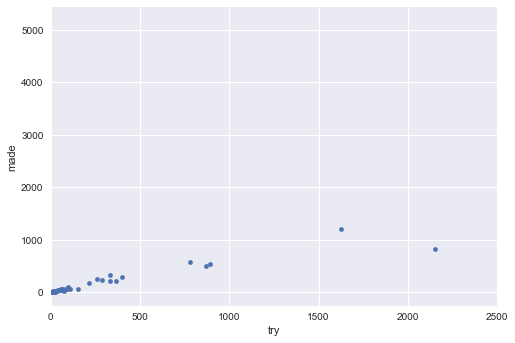

In [67]:
data_action.plot(kind = 'scatter', x='try', y = 'made', xlim =(0,2500))

In [68]:
 from pandas.plotting import scatter_matrix
    

C:\Users\namso_000\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1610612747.0, right=1610612747.0
  'left=%s, right=%s') % (left, right))
C:\Users\namso_000\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1610612747.0, top=1610612747.0
  'bottom=%s, top=%s') % (bottom, top))


LinAlgError: singular matrix

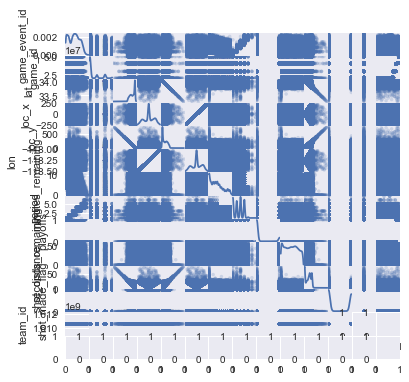

In [69]:
scatter_matrix(data, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [18]:
import seaborn as sns

In [ ]:
sns.barplot(data = data_action_type, x='action_type', y = 'per', hue = 'action_type')